<a href="https://colab.research.google.com/github/Fahim-Anin/PyTorch_Fundamentals/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create The Dataset and Split into train and test dataset**

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


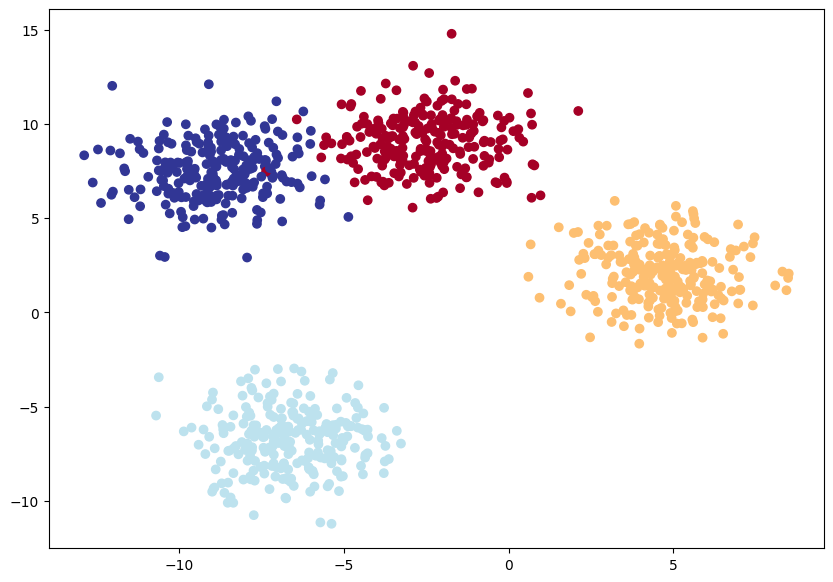

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2  #Determines the number of dimensions or attributes for each data point in the generated dataset.
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)  It determines how spread out the points within each cluster are
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7)) #10inch and 7 inch figure
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
X_blob_train.shape, y_blob_train[:4]

(torch.Size([800, 2]), tensor([1, 0, 2, 2]))

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), ?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_1 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

**Getting prediction probabilities for a multi-class PyTorch model**

In [ ]:
# Perform a single forward pass on the data  to get prediction
train_preds=model_1(X_blob_train.to(device))[:5]
train_preds,

(tensor([[ 0.2555, -0.2052,  0.4086,  0.0590],
         [-0.0896,  0.2578,  0.4419,  0.3596],
         [-0.1248, -0.0124,  1.1400,  0.3293],
         [-0.1003,  0.0530,  0.7488,  0.4039],
         [-0.0182,  0.1236,  0.3356,  0.4519]], device='cuda:0',
        grad_fn=<SliceBackward0>),)

In [ ]:
# Make prediction logits with model
test_logits = model_1(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
test_pred_probs = torch.softmax(test_logits, dim=1)
print(test_logits[:5])
print(test_pred_probs[:5])

tensor([[ 0.1226, -0.0275,  0.4799,  0.0514],
        [-0.0526,  0.2934,  0.3485,  0.6610],
        [-0.0471, -0.1126,  0.9967,  0.3265],
        [ 0.3168, -0.2748,  0.3008,  0.2010],
        [-0.1497,  0.3624,  0.5647,  0.2006]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2369, 0.2039, 0.3386, 0.2206],
        [0.1681, 0.2376, 0.2511, 0.3432],
        [0.1605, 0.1503, 0.4559, 0.2332],
        [0.2917, 0.1614, 0.2871, 0.2598],
        [0.1631, 0.2722, 0.3332, 0.2315]], device='cuda:0',
       grad_fn=<SliceBackward0>)


 there's one value for each class in test_pred_probs, the index of the highest value is the class the model thinks the specific data sample most belongs to.
**We can check which index has the highest value using torch.argmax().**

In [ ]:

print(test_pred_probs[0])
print(torch.argmax(test_pred_probs[0]))

tensor([0.2369, 0.2039, 0.3386, 0.2206], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(2, device='cuda:0')


In [ ]:
test_preds_round=(torch.argmax(test_pred_probs,dim=1))
test_preds_round

tensor([2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 0, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2,
        3, 3, 0, 3, 2, 0, 3, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3,
        3, 3, 2, 3, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 0, 3, 3, 3,
        0, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2,
        2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3,
        0, 3, 2, 2, 3, 0, 2, 2], device='cuda:0')

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.03577, Acc: 99.00% | Test Loss: 0.02681, Test Acc: 99.50%
Epoch: 10 | Loss: 0.03435, Acc: 99.00% | Test Loss: 0.02529, Test Acc: 99.50%
Epoch: 20 | Loss: 0.03323, Acc: 99.00% | Test Loss: 0.02407, Test Acc: 99.50%
Epoch: 30 | Loss: 0.03232, Acc: 99.00% | Test Loss: 0.02307, Test Acc: 99.50%
Epoch: 40 | Loss: 0.03158, Acc: 99.00% | Test Loss: 0.02222, Test Acc: 99.50%
Epoch: 50 | Loss: 0.03096, Acc: 99.00% | Test Loss: 0.02150, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03044, Acc: 99.00% | Test Loss: 0.02088, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02999, Acc: 99.00% | Test Loss: 0.02034, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02960, Acc: 99.00% | Test Loss: 0.01987, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02927, Acc: 99.00% | Test Loss: 0.01945, Test Acc: 99.50%
Epoch: 100 | Loss: 0.02897, Acc: 99.00% | Test Loss: 0.01907, Test Acc: 99.50%
Epoch: 110 | Loss: 0.02870, Acc: 99.00% | Test Loss: 0.01873, Test Acc: 99.50%
Epoch: 120 | Loss: 0.02847, Acc: 99.00% | Test Loss: 0.01842, T

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

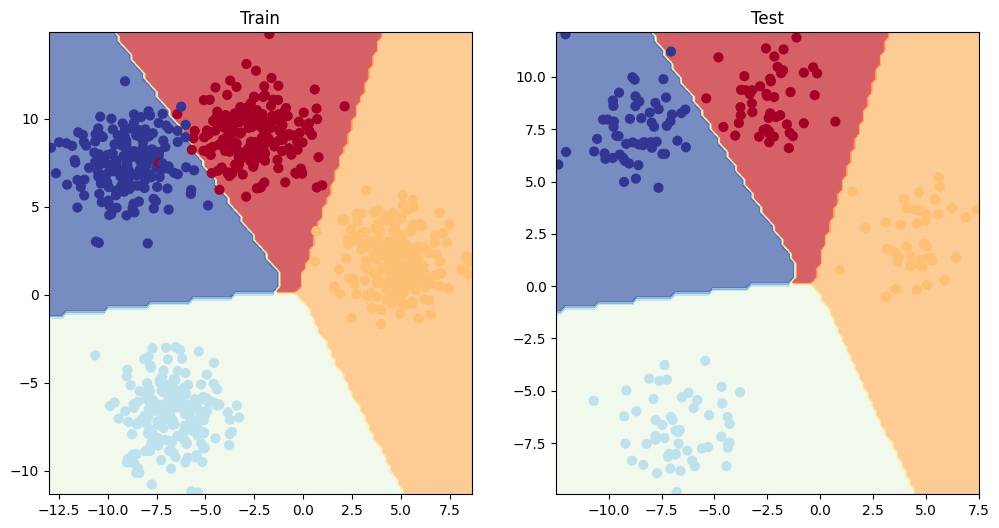

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)